# How much does activity level effect sleep time?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

In [2]:
daily_activity = pd.read_csv("Fitness  Data\dailyActivity_merged.csv")
sleep_activity_daily = pd.read_csv("Fitness  Data\sleepDay_merged.csv")
weight_log = pd.read_csv("Fitness  Data\weightLogInfo_merged.csv")
heart_rate = pd.read_csv("Fitness  Data\heartrate_seconds_merged.csv")

In [3]:
len(daily_activity.Id.unique())

33

In [4]:
daily_activity.index = pd.to_datetime(daily_activity['ActivityDate'])

In [5]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

In [6]:
daily_activity.rename(columns={'ActivityDate':'Date'},inplace=True)

In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2016-04-12 to 2016-05-12
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  Lig

In [8]:
sleep_activity_daily.index = pd.to_datetime(sleep_activity_daily['SleepDay'])
sleep_activity_daily['SleepDay'] = pd.to_datetime(sleep_activity_daily['SleepDay'])

In [9]:
sleep_activity_daily.rename(columns={'SleepDay':'Date'},inplace=True)

In [10]:
sleep_activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 2016-04-12 to 2016-05-04
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   Date                413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.4 KB


In [11]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [12]:
weight_log.index = pd.to_datetime(weight_log['Date']).dt.date
weight_log['Date'] =  pd.to_datetime(weight_log['Date']).dt.date

In [13]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Date,,,,,,,,
2016-05-02,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
2016-05-03,1503960366,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1462319999000
2016-04-13,1927972279,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1460509732000
2016-04-21,2873212765,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1461283199000
2016-05-12,2873212765,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [14]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2016-05-02 to 2016-05-12
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 4.3+ KB


In [15]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [16]:
heart_rate.rename(columns={'Time':'Date'},inplace=True)

In [17]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Date    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [18]:
dataframes = [
daily_activity, 
sleep_activity_daily, 
weight_log,
heart_rate
]
num_of_ids = []

for i in dataframes:
    num_of_ids.append(len(i['Id'].unique()))
print(num_of_ids)    

[33, 24, 8, 14]


In [19]:
print(daily_activity['Id'].dtype)
print(daily_activity['Date'].dtype)

int64
datetime64[ns]


In [20]:
print(sleep_activity_daily['Id'].dtype)
print(sleep_activity_daily['Date'].dtype)

int64
datetime64[ns]


In [21]:
daily_activity_and_sleep = pd.merge(daily_activity,sleep_activity_daily, on=['Id','Date'])

In [22]:
daily_activity_and_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   Date                      413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [23]:
users_mean_metrics = daily_activity_and_sleep.groupby("Id")

In [24]:
daily_activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [25]:
heatmap_features = ['TotalDistance','TotalSteps','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalSleepRecords','TotalMinutesAsleep']

In [26]:
new_features = ['TotalSteps','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalMinutesAsleep']

<Axes: >

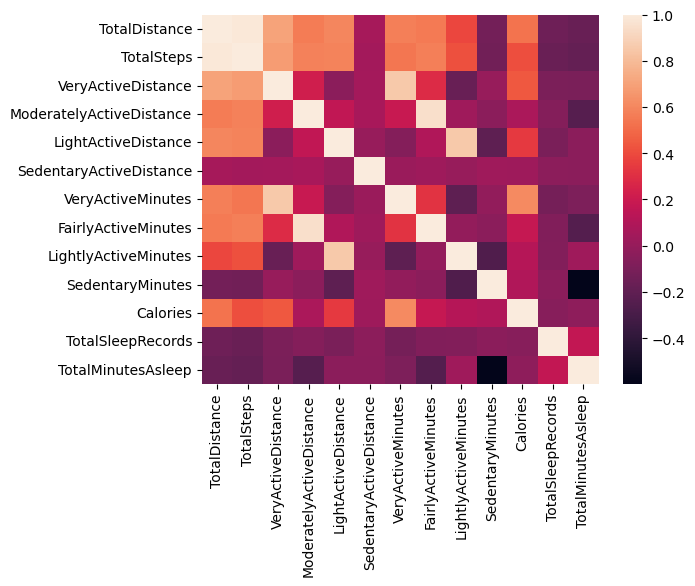

In [27]:
sns.heatmap(daily_activity_and_sleep[heatmap_features].corr())

<Axes: >

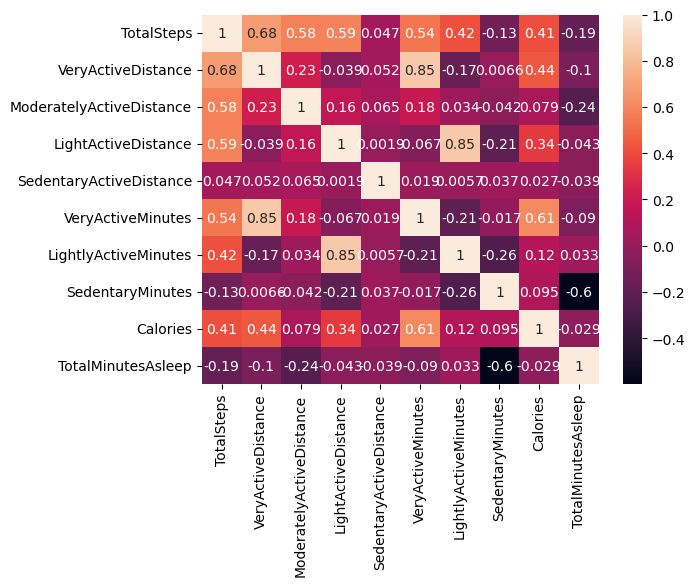

In [28]:
sns.heatmap(daily_activity_and_sleep[new_features].corr(),annot=True)

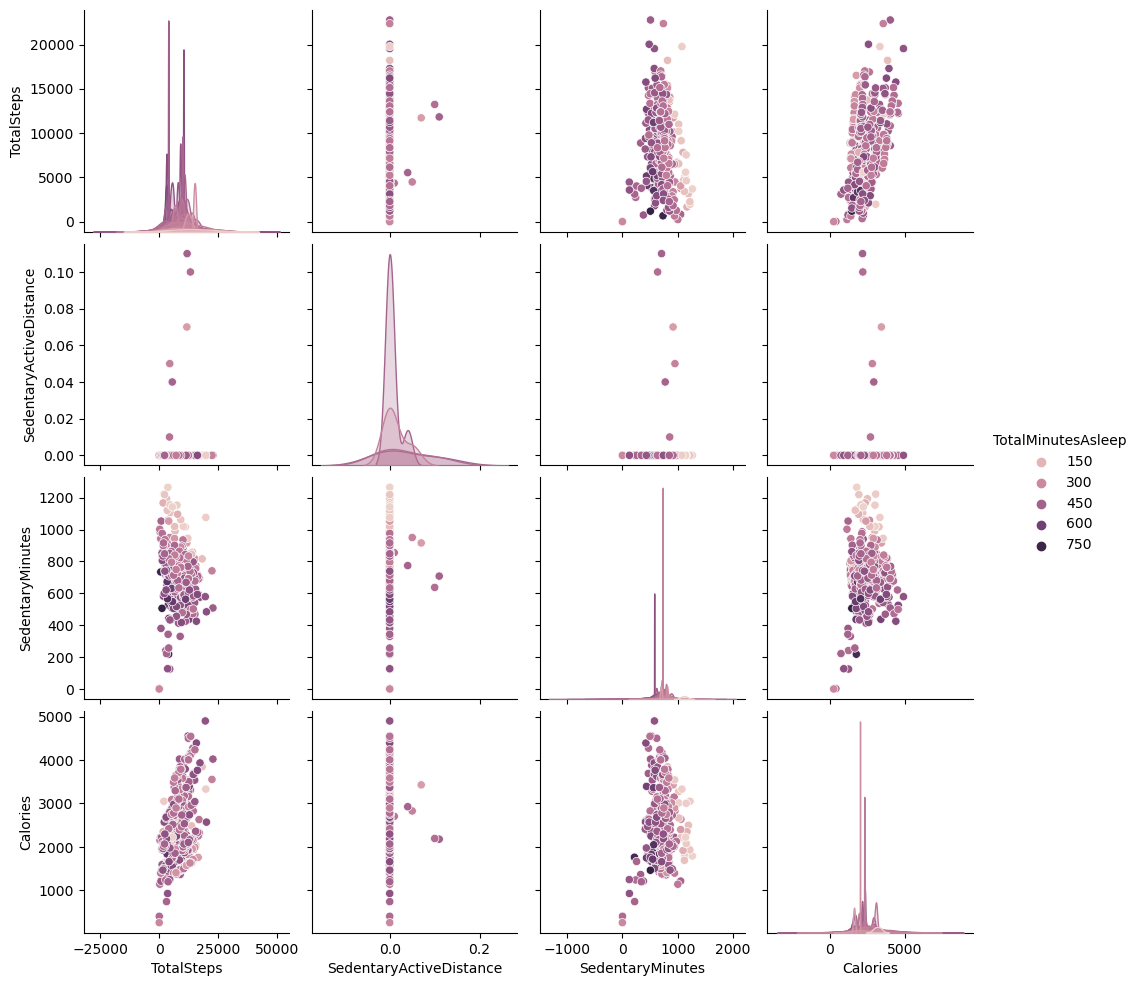

In [29]:
sns.pairplot(daily_activity_and_sleep[['TotalSteps','SedentaryActiveDistance','SedentaryMinutes','Calories','TotalMinutesAsleep']],hue='TotalMinutesAsleep')


In [30]:
daily_activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [31]:
column_names = ['body_weight','strength_gains','waist_msr','Calories','avg_sleep_scr','TotalMinutesAsleep','avg_rest_hrt','avg_heart_rate','heart_rate_variation', 'protein','stress_analysis','client_ID','date','total_steps']
my_df = pd.DataFrame(columns=column_names)

In [32]:
my_df.head()

,body_weight,strength_gains,waist_msr,Calories,avg_sleep_scr,TotalMinutesAsleep,avg_rest_hrt,avg_heart_rate,heart_rate_variation,protein,stress_analysis,client_ID,date,total_steps


In [33]:
my_df['date'] = daily_activity_and_sleep['Date']
my_df['total_steps'] = daily_activity_and_sleep['TotalSteps']
my_df['TotalMinutesAsleep'] = daily_activity_and_sleep['TotalMinutesAsleep']
my_df['client_ID'] = daily_activity_and_sleep['Id']
my_df['Calories'] = daily_activity_and_sleep['Calories']

In [34]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   body_weight           0 non-null      object        
 1   strength_gains        0 non-null      object        
 2   waist_msr             0 non-null      object        
 3   Calories              413 non-null    int64         
 4   avg_sleep_scr         0 non-null      object        
 5   TotalMinutesAsleep    413 non-null    int64         
 6   avg_rest_hrt          0 non-null      object        
 7   avg_heart_rate        0 non-null      object        
 8   heart_rate_variation  0 non-null      object        
 9   protein               0 non-null      object        
 10  stress_analysis       0 non-null      object        
 11  client_ID             413 non-null    int64         
 12  date                  413 non-null    datetime64[ns]
 13  total_steps         

In [35]:
daily_activity_and_sleep.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            403, 404, 405, 406, 407, 408, 409, 410, 411, 412],
           dtype='int64', length=413)

In [36]:
my_df['date'] = pd.to_datetime(my_df['date'])
weight_log['Date'] = pd.to_datetime(weight_log['Date'])

In [37]:
# Reset the index and drop the 'Date' index if it exists
if 'Date' in weight_log.index.names:
    weight_log = weight_log.reset_index(drop=True)

# Perform the merge
my_df = my_df.merge(weight_log, left_on=['client_ID', 'date'], right_on=['Id', 'Date'], how='left')


In [38]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   body_weight           0 non-null      object        
 1   strength_gains        0 non-null      object        
 2   waist_msr             0 non-null      object        
 3   Calories              413 non-null    int64         
 4   avg_sleep_scr         0 non-null      object        
 5   TotalMinutesAsleep    413 non-null    int64         
 6   avg_rest_hrt          0 non-null      object        
 7   avg_heart_rate        0 non-null      object        
 8   heart_rate_variation  0 non-null      object        
 9   protein               0 non-null      object        
 10  stress_analysis       0 non-null      object        
 11  client_ID             413 non-null    int64         
 12  date                  413 non-null    datetime64[ns]
 13  total_steps         

In [39]:
my_df.drop(columns=['WeightKg','Fat','BMI','IsManualReport','LogId','Date'],inplace=True)


In [40]:
my_df.head()

,body_weight,strength_gains,waist_msr,Calories,avg_sleep_scr,TotalMinutesAsleep,avg_rest_hrt,avg_heart_rate,heart_rate_variation,protein,stress_analysis,client_ID,date,total_steps,Id,WeightPounds
0,NaN,NaN,NaN,1985,NaN,327,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-12,13162,NaN,NaN
1,NaN,NaN,NaN,1797,NaN,384,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-13,10735,NaN,NaN
2,NaN,NaN,NaN,1745,NaN,412,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-15,9762,NaN,NaN
3,NaN,NaN,NaN,1863,NaN,340,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-16,12669,NaN,NaN
4,NaN,NaN,NaN,1728,NaN,700,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-17,9705,NaN,NaN


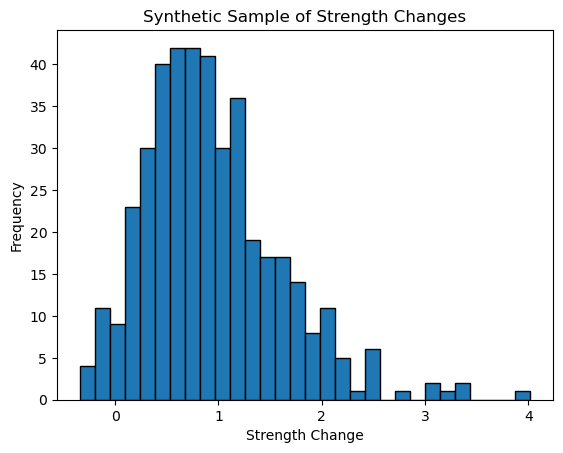

[0.62250732 1.19780224 0.4918836  1.38007949 1.01480577 0.7093265
 0.60080709 2.03989247 0.72317854 0.53810552]


In [41]:
size = len(my_df)  # number of samples
alpha = 4  # Positive value for right skew
loc = 0.1  # Location (mean)
scale = 1  # Scale (standard deviation)

# Generate skewed normal distributed values
strength_changes = skewnorm.rvs(alpha, loc, scale, size=size)

# Plot the distribution
plt.hist(strength_changes, bins=30, edgecolor='black')
plt.xlabel('Strength Change')
plt.ylabel('Frequency')
plt.title('Synthetic Sample of Strength Changes')
plt.show()

# Example output
print(strength_changes[:10])  # Print first 10 samples

my_df['strength_gains'] = strength_changes

In [42]:
heart_rate.head()

,Id,Date,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [43]:
len(heart_rate['Id'].unique())

14

daily_avg_heart_rate = pd.DataFrame(daily_avg_heart_rate)

daily_avg_heart_rate.head()

daily_avg_heart_rate.index.name = 'date'

daily_avg_heart_rate = daily_avg_heart_rate.reset_index(level=0, drop=True)

daily_avg_heart_rate.head()

import pickle
with open('daily_avg_hr.pkl','wb') as file:
    pickle.dump(daily_avg_heart_rate,file)

In [44]:
import pickle
with open('daily_avg_hr.pkl', 'rb') as file:
    # Load the DataFrame from the pickle file
    daily_avg_heart_rate = pickle.load(file)

daily_avg_heart_rate.head()

,Id,Value
Date,,
2016-04-12,2.022484e+09,75.804177
2016-04-13,2.022484e+09,80.337584
2016-04-14,2.022484e+09,72.628597
2016-04-15,2.022484e+09,80.437382
2016-04-16,2.022484e+09,75.960547


In [45]:
new_df = my_df.merge(daily_avg_heart_rate,how='left', left_on=['client_ID', 'date'], right_on=['Id', 'Date'])

In [46]:
new_df.Value.isna().sum()

231

<Axes: >

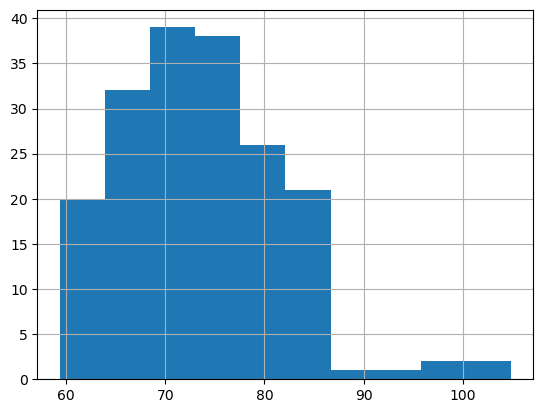

In [47]:
new_df.Value.hist()

In [48]:
filtered_df = new_df[new_df['Value'].notnull()]

# Count unique client_IDs
unique_client_ids_count = filtered_df['client_ID'].nunique()

print(f"Number of client_IDs with a value for avg heart rate: {unique_client_ids_count}")


Number of client_IDs with a value for avg heart rate: 12


In [49]:
new_df['avg_heart_rate'] = new_df['Value']

In [50]:
new_df.drop(columns=['Id_y','Id_x','Value','body_weight'],axis=1,inplace=True)


In [51]:
new_df.head()

,strength_gains,waist_msr,Calories,avg_sleep_scr,TotalMinutesAsleep,avg_rest_hrt,avg_heart_rate,heart_rate_variation,protein,stress_analysis,client_ID,date,total_steps,WeightPounds
0,0.622507,NaN,1985,NaN,327,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-12,13162,NaN
1,1.197802,NaN,1797,NaN,384,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-13,10735,NaN
2,0.491884,NaN,1745,NaN,412,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-15,9762,NaN
3,1.380079,NaN,1863,NaN,340,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-16,12669,NaN
4,1.014806,NaN,1728,NaN,700,NaN,NaN,NaN,NaN,NaN,1503960366,2016-04-17,9705,NaN


In [ ]:
features_to_predict = ['strength_gains','avg_sleep_scr','avg_rest_hrt','heart_rate_variation','WeightPounds','waist_msr']

In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   strength_gains        413 non-null    float64       
 1   waist_msr             0 non-null      object        
 2   Calories              413 non-null    int64         
 3   avg_sleep_scr         0 non-null      object        
 4   TotalMinutesAsleep    413 non-null    int64         
 5   avg_rest_hrt          0 non-null      object        
 6   avg_heart_rate        182 non-null    float64       
 7   heart_rate_variation  0 non-null      object        
 8   protein               0 non-null      object        
 9   stress_analysis       0 non-null      object        
 10  client_ID             413 non-null    int64         
 11  date                  413 non-null    datetime64[ns]
 12  total_steps           413 non-null    int64         
 13  WeightPounds        

In [77]:
dashboard_df = new_df[['total_steps','date','client_ID','avg_heart_rate','TotalMinutesAsleep','Calories','strength_gains']]

In [78]:
import pandas as pd
from sklearn.impute import KNNImputer

# Example DataFrame
# dashboard_df = ...

# Separating numerical and non-numerical (e.g., datetime) columns
numerical_df = dashboard_df.select_dtypes(include=['int64', 'float64'])
non_numerical_df = dashboard_df.select_dtypes(exclude=['int64', 'float64'])

# Perform KNN Imputation on numerical data
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numerical_df)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_df.columns)

# Reintegrate the non-numerical data
dashboard = pd.concat([imputed_df, non_numerical_df], axis=1)



In [83]:
ids = dashboard['client_ID'].unique()

In [92]:
ids
count = 1
id_map = {}
for i in ids:
    id_map[i] = count
    count +=1
    
dashboard['client_ID'] = dashboard['client_ID'].map(id_map)

In [93]:
dashboard['client_ID']

0       1
1       1
2       1
3       1
4       1
       ..
408    24
409    24
410    24
411    24
412    24
Name: client_ID, Length: 413, dtype: int64

In [ ]:
dashboard['client_ID'].map(id_map)

In [96]:
dashboard.head()

,total_steps,client_ID,avg_heart_rate,TotalMinutesAsleep,Calories,strength_gains,date
0,13162.0,1,85.144831,327.0,1985.0,0.622507,2016-04-12
1,10735.0,1,85.243158,384.0,1797.0,1.197802,2016-04-13
2,9762.0,1,84.788958,412.0,1745.0,0.491884,2016-04-15
3,12669.0,1,85.144831,340.0,1863.0,1.380079,2016-04-16
4,9705.0,1,84.878378,700.0,1728.0,1.014806,2016-04-17


In [80]:
dashboard.to_csv('dashboard_data.csv',index=False)

<Axes: >

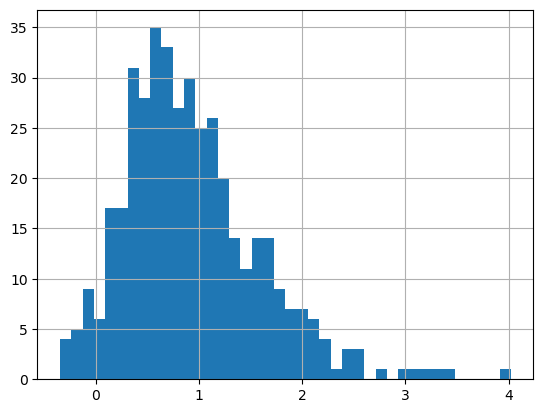

In [74]:
dashboard.strength_gains.hist(bins=40)

In [60]:
dashboard_df.head()

,WeightPounds,total_steps,date,client_ID,avg_heart_rate,TotalMinutesAsleep,Calories,strength_gains
0,NaN,13162,2016-04-12,1503960366,NaN,327,1985,0.622507
1,NaN,10735,2016-04-13,1503960366,NaN,384,1797,1.197802
2,NaN,9762,2016-04-15,1503960366,NaN,412,1745,0.491884
3,NaN,12669,2016-04-16,1503960366,NaN,340,1863,1.380079
4,NaN,9705,2016-04-17,1503960366,NaN,700,1728,1.014806


In [53]:
grouped = new_df.groupby(['client_ID', 'date'])

C:\Users\mainf\AppData\Local\Temp\ipykernel_41380\2212154297.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = grouped.mean()  # or mean(), depending on your data


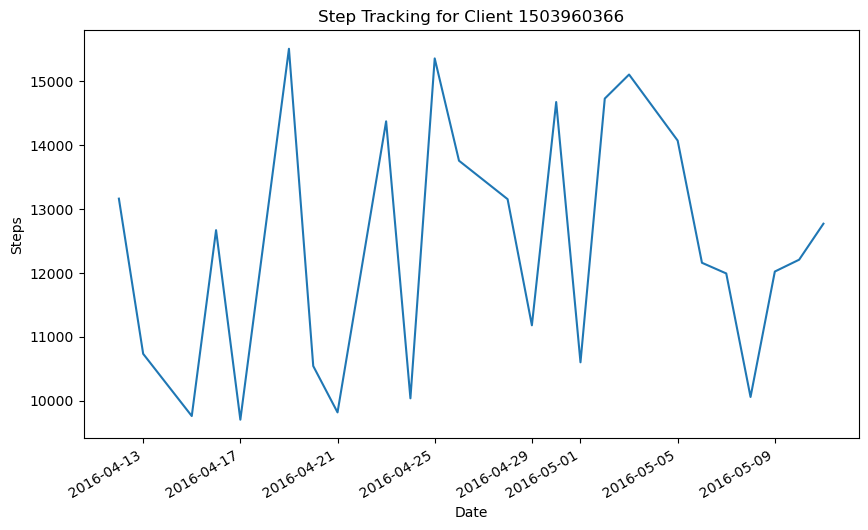

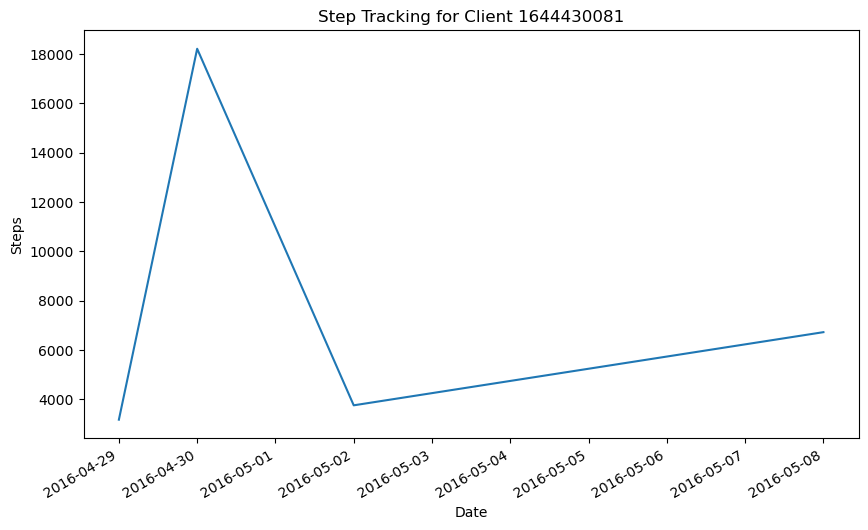

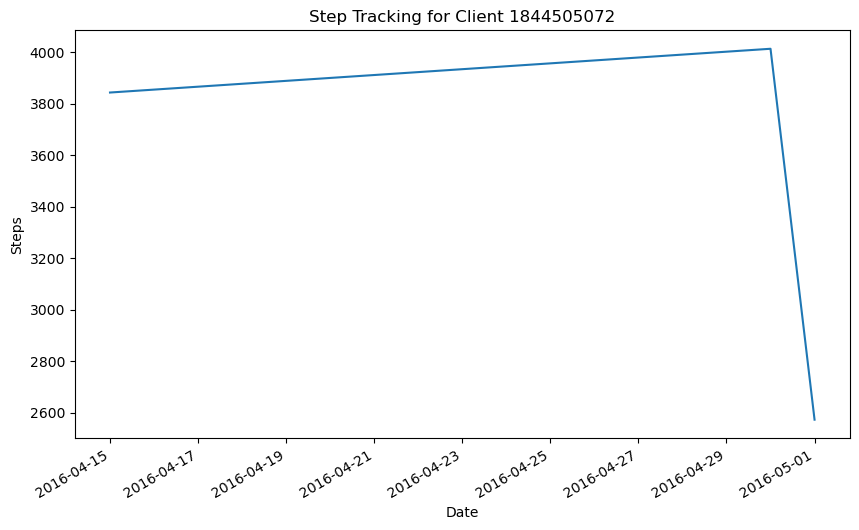

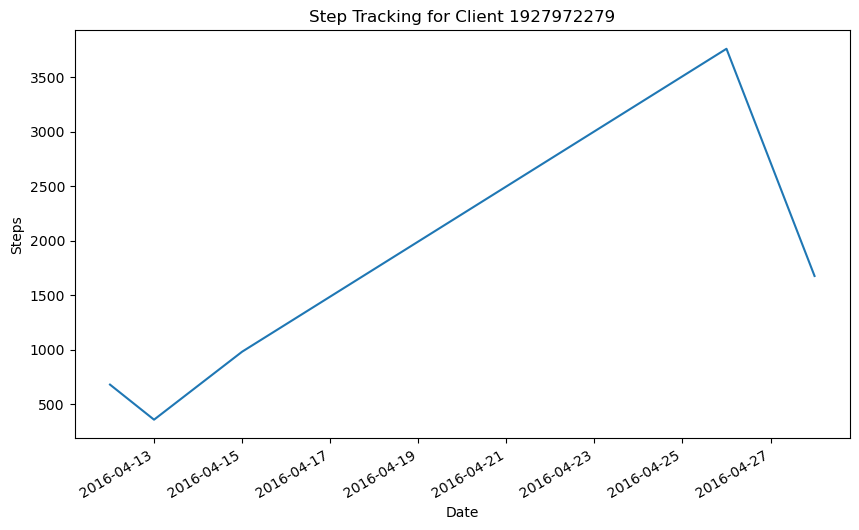

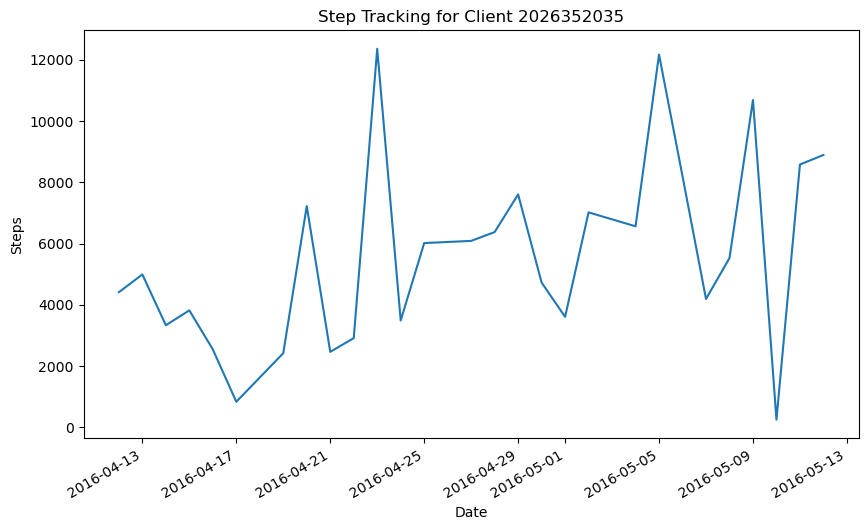

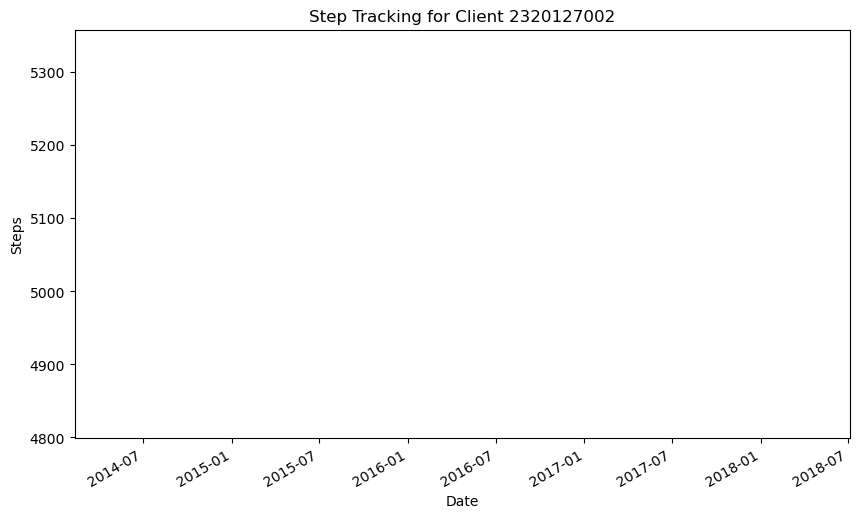

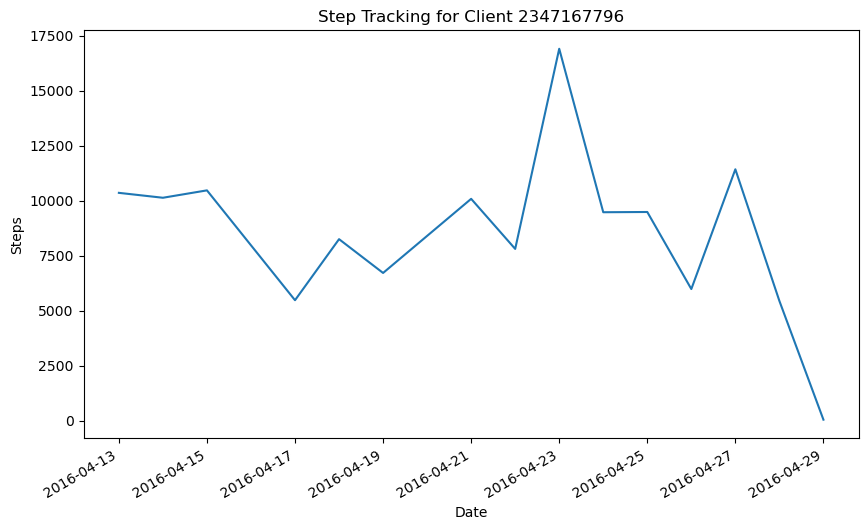

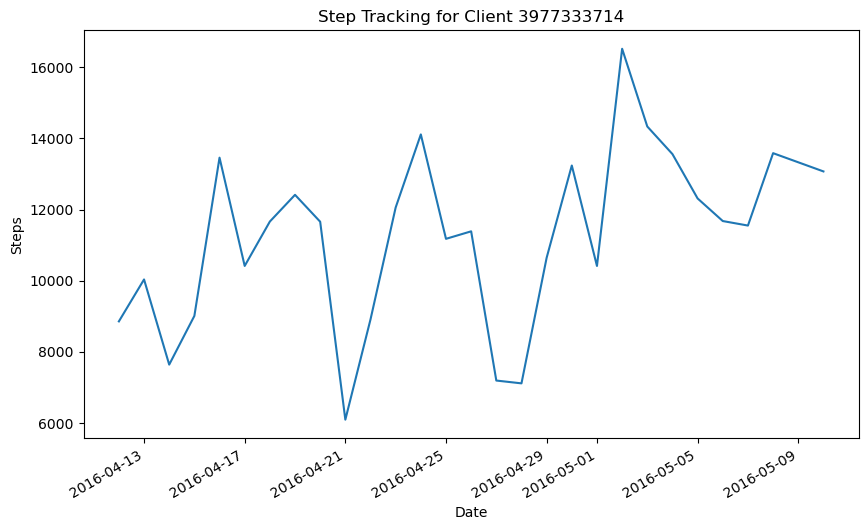

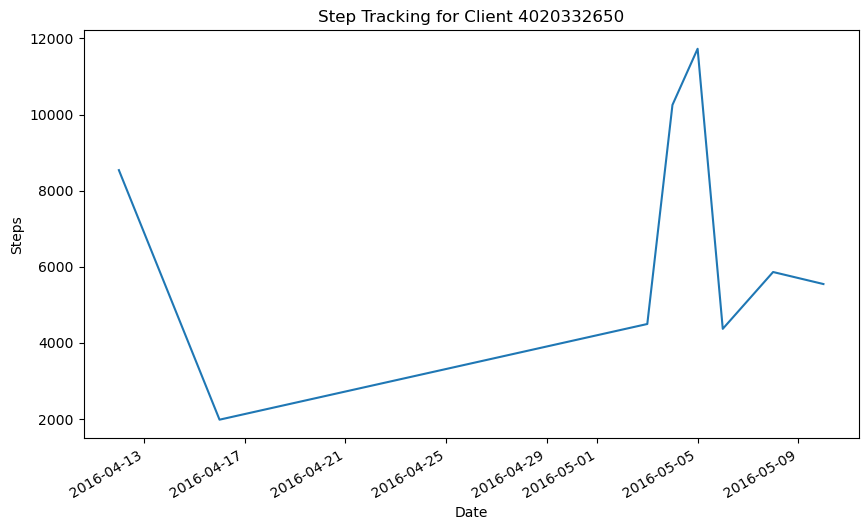

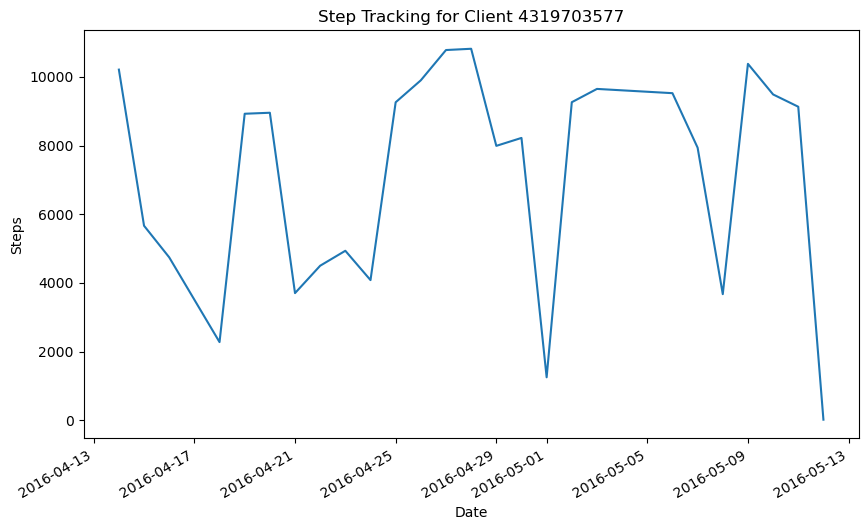

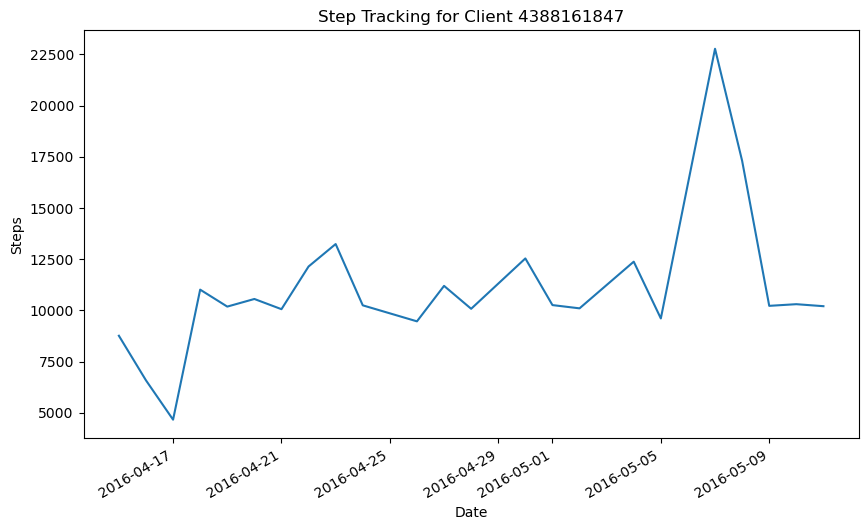

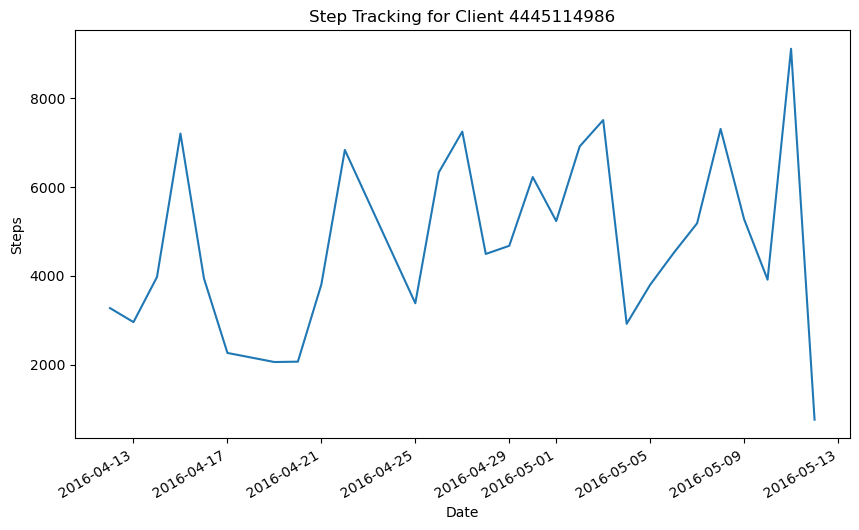

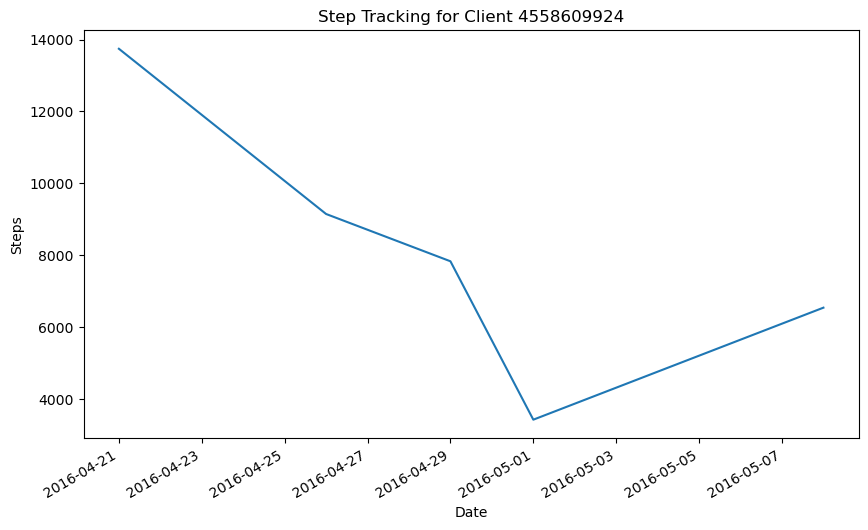

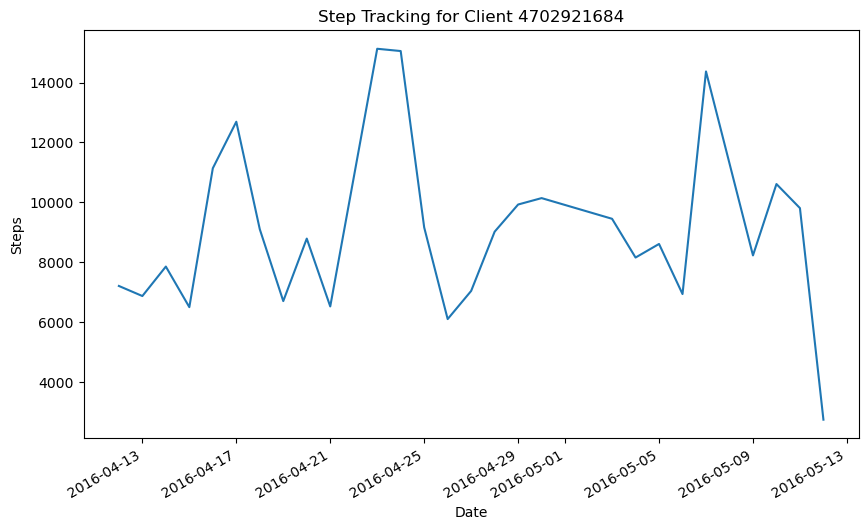

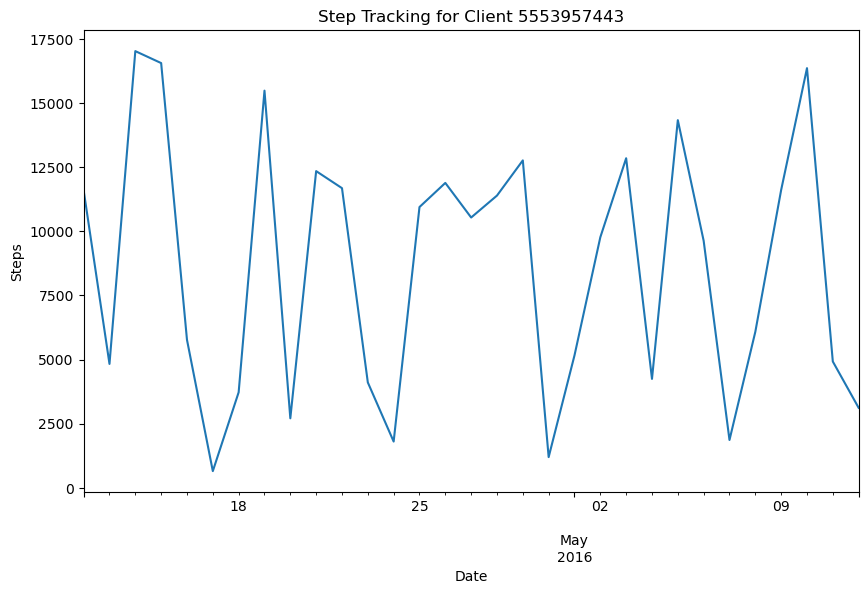

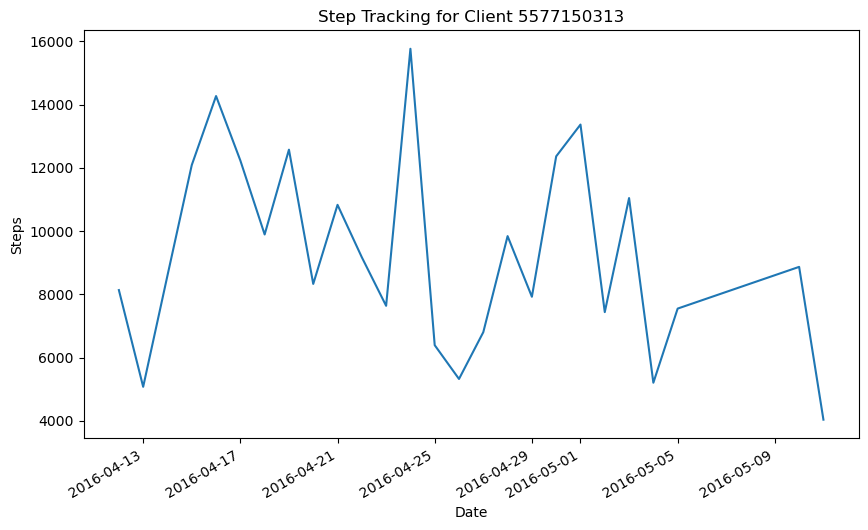

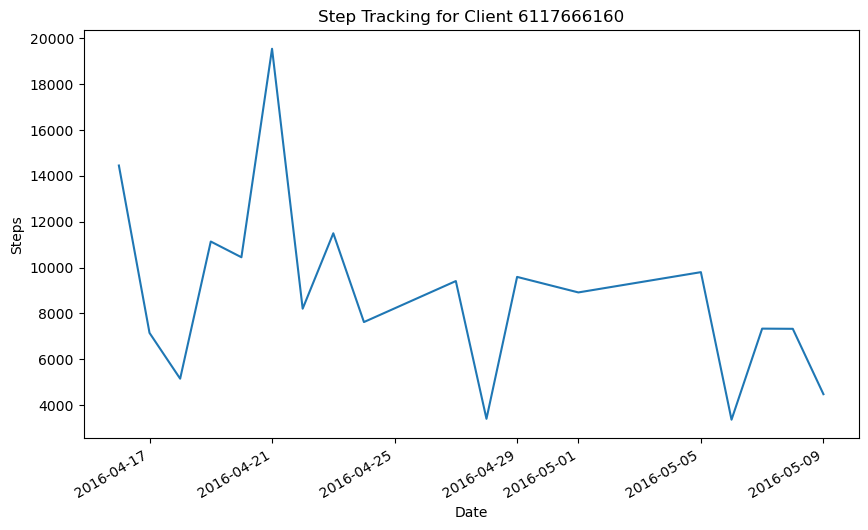

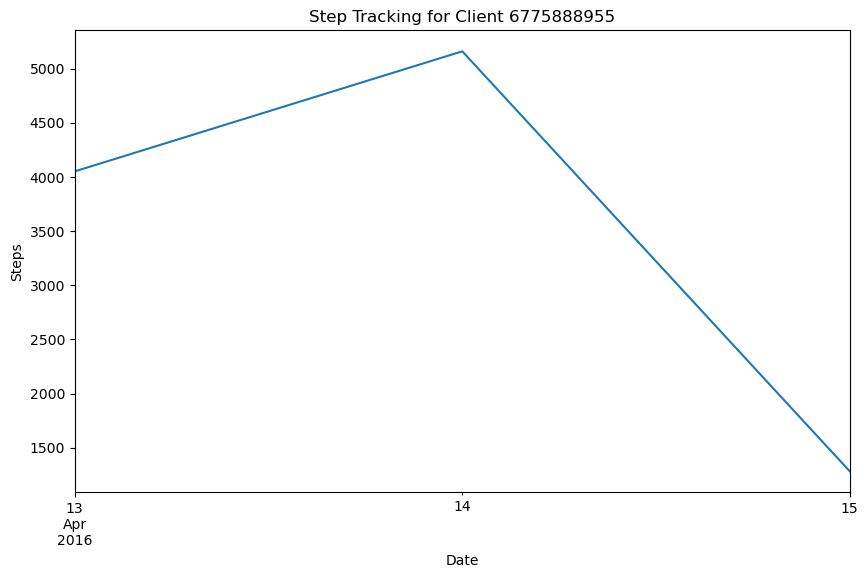

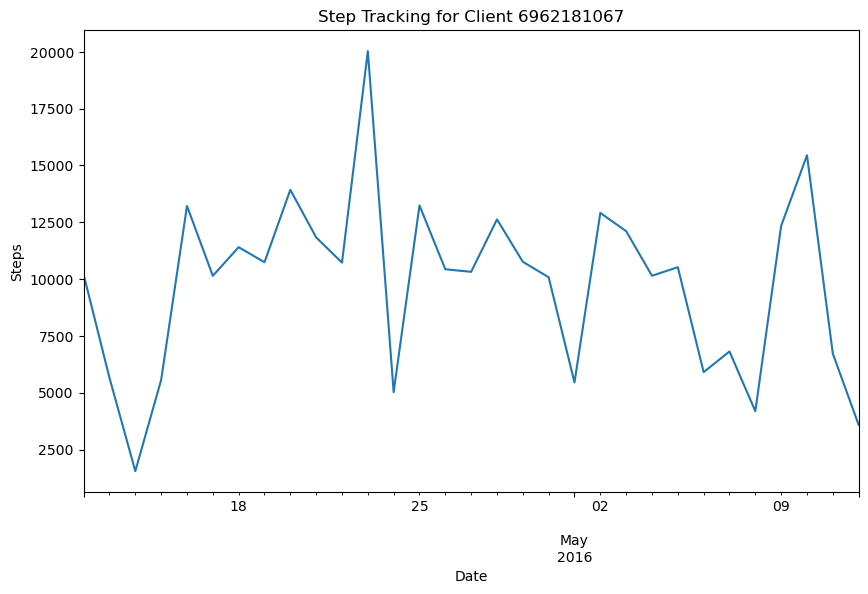

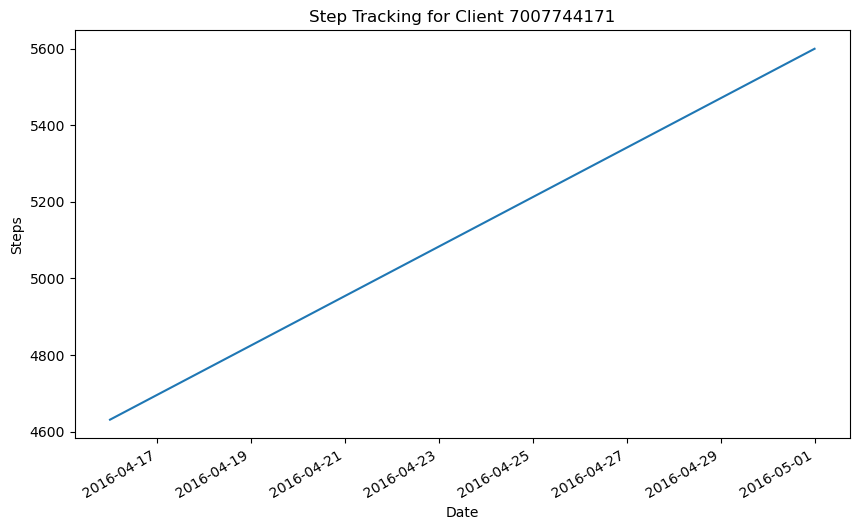

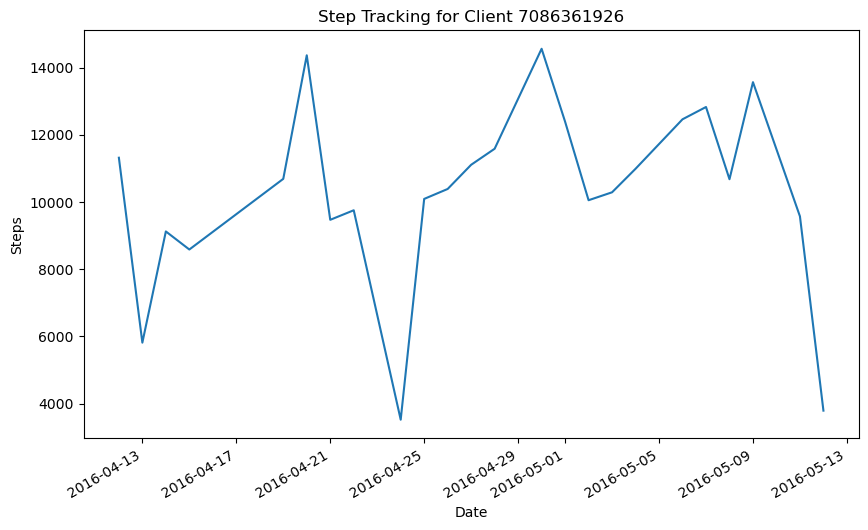

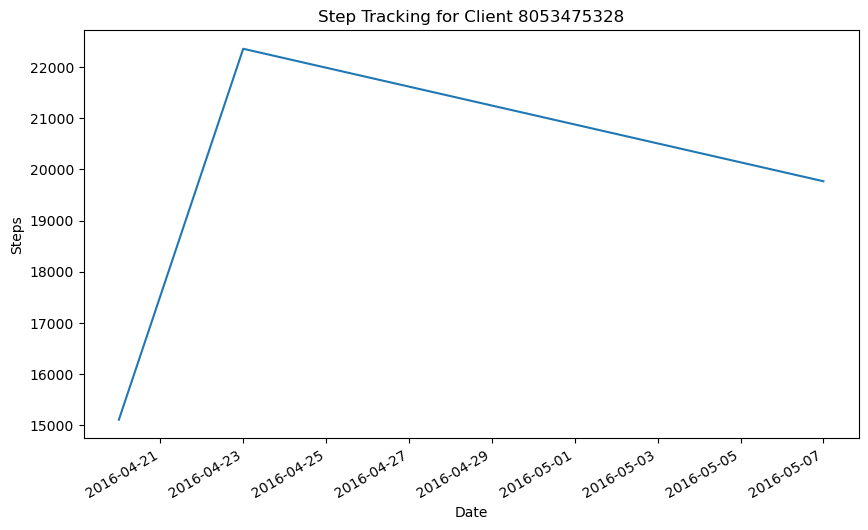

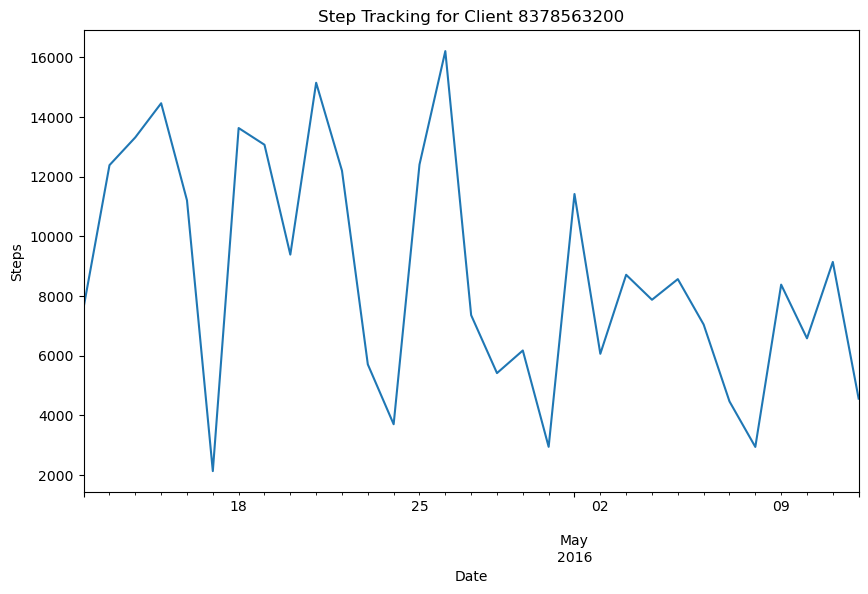

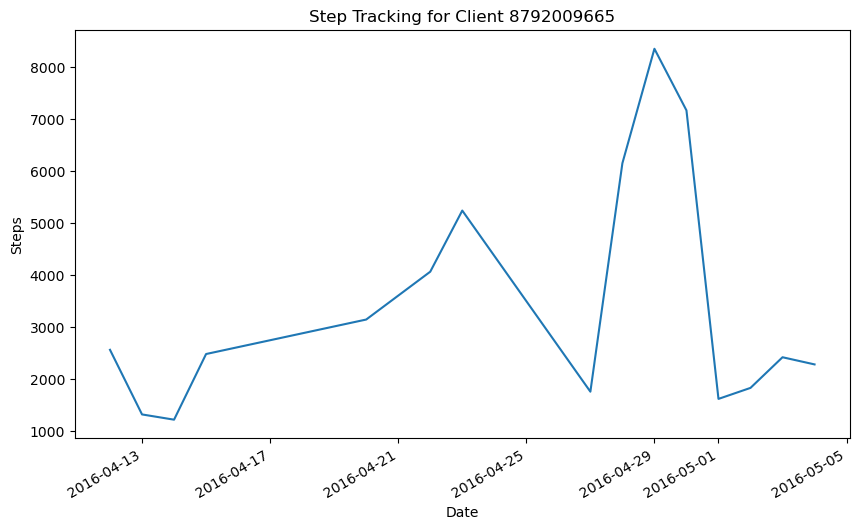

In [54]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'client_ID', 'date', and 'weight'
# Group the data
grouped = grouped.mean()  # or mean(), depending on your data

# Pivot the DataFrame for easy plotting
df_pivoted = grouped['total_steps'].unstack(level=0)

# Plotting
for client_id in df_pivoted.columns:
    plt.figure(figsize=(10, 6))
    df_pivoted[client_id].dropna().plot(title=f'Step Tracking for Client {client_id}')
    plt.xlabel('Date')
    plt.ylabel('Steps')
    plt.show()


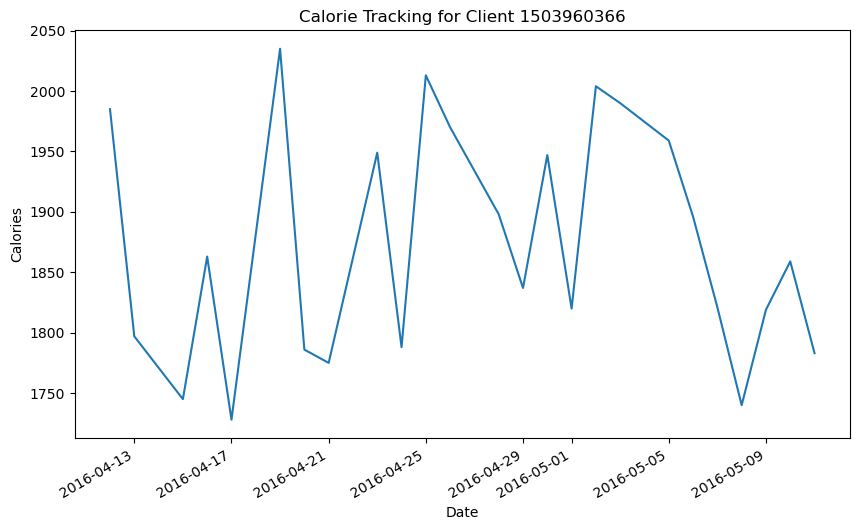

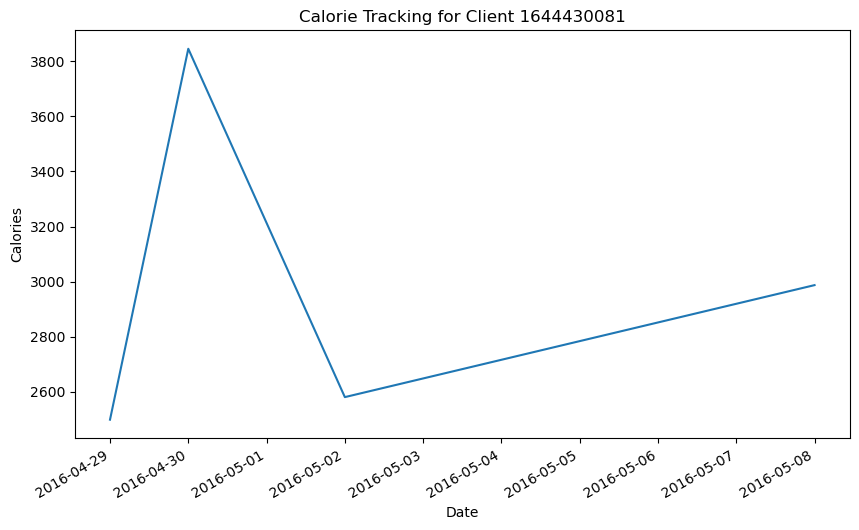

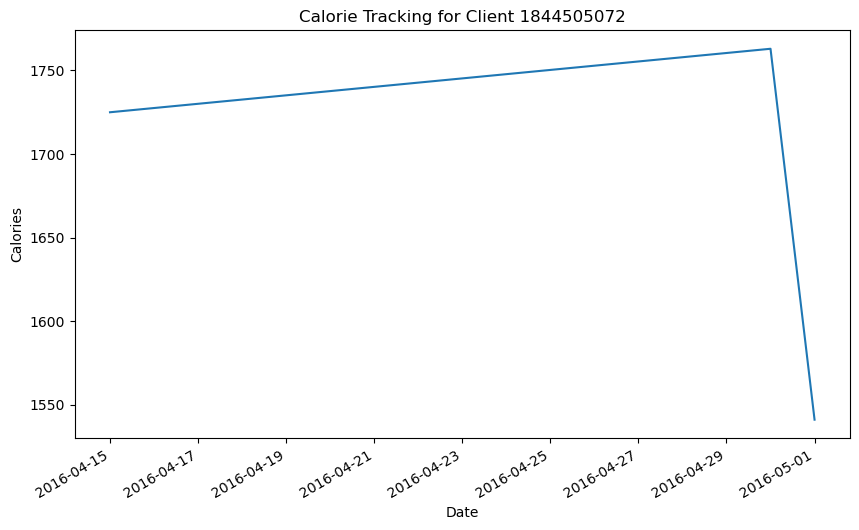

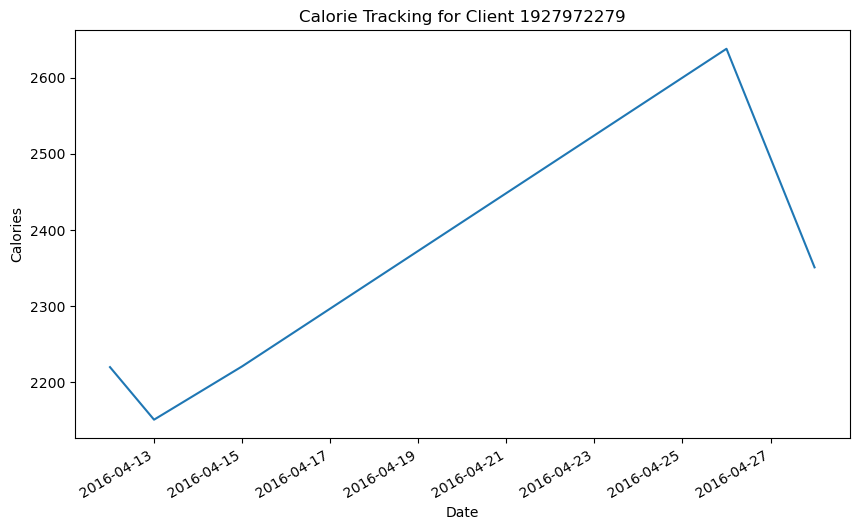

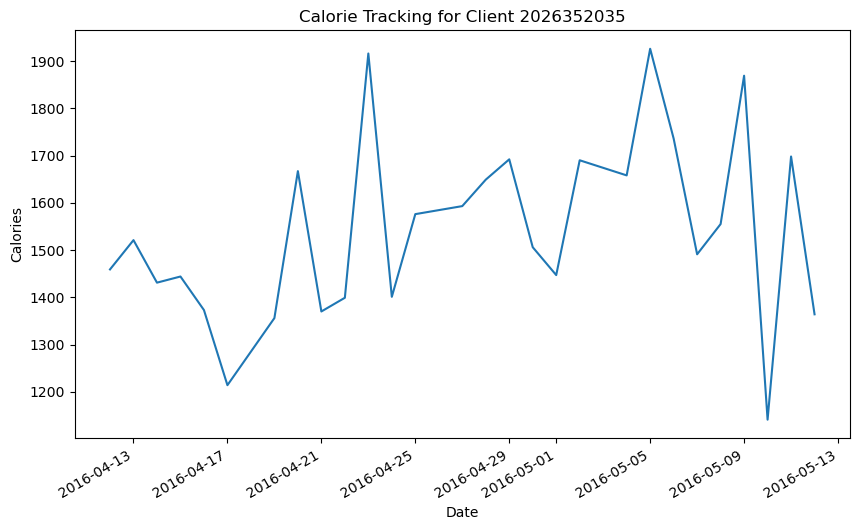

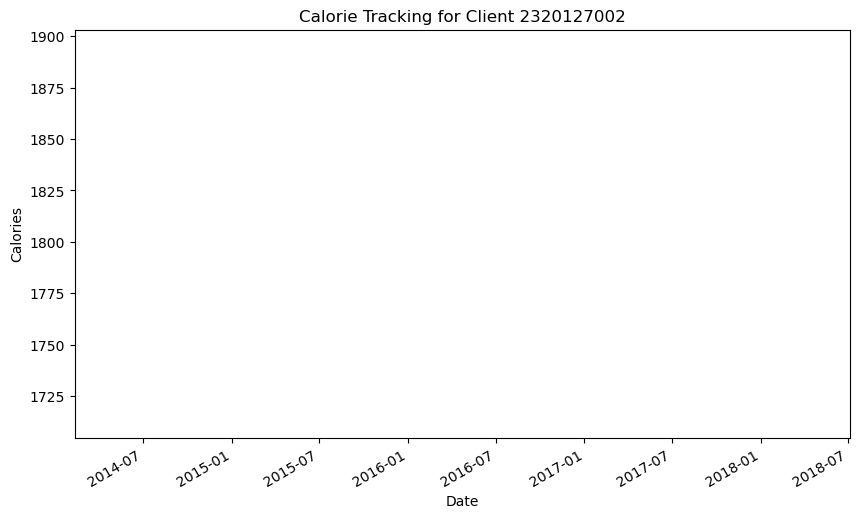

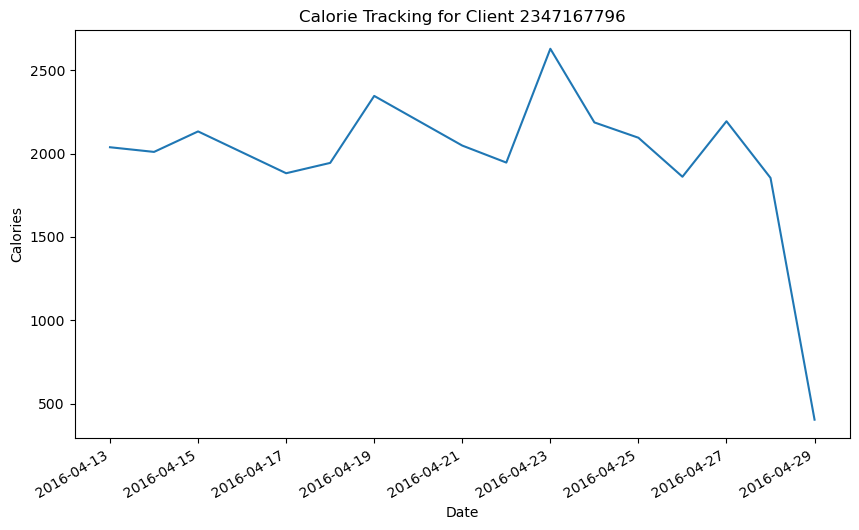

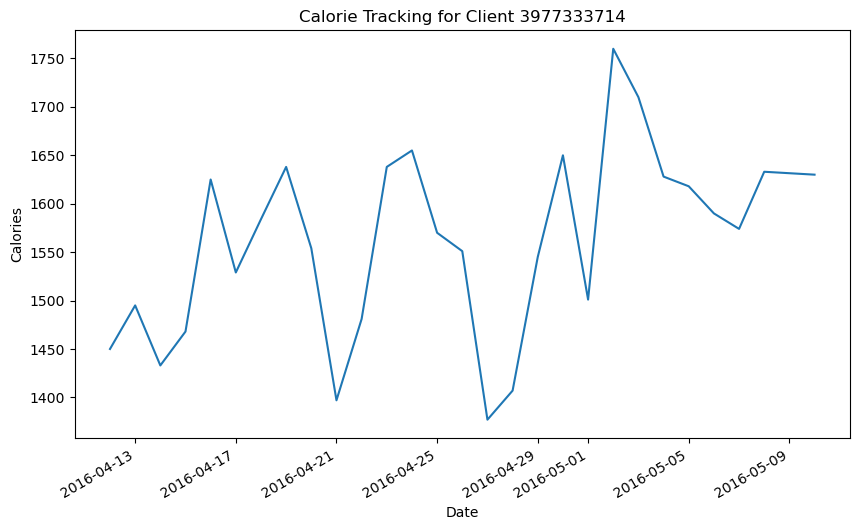

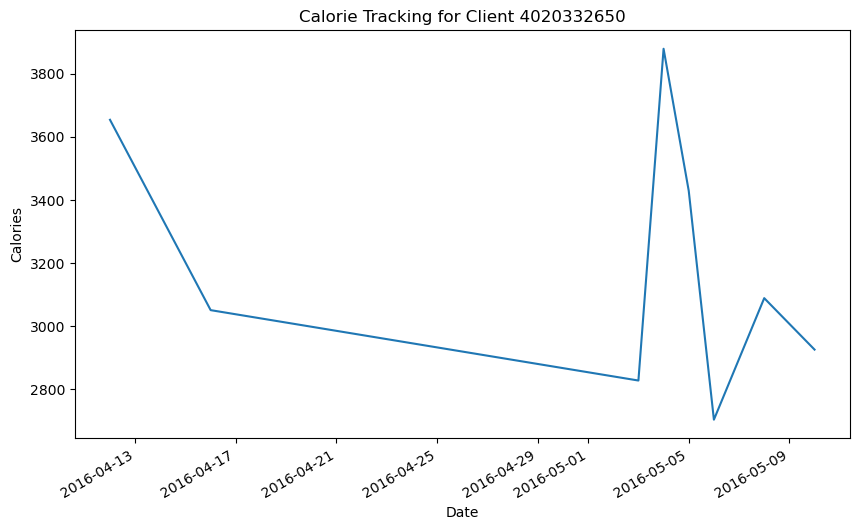

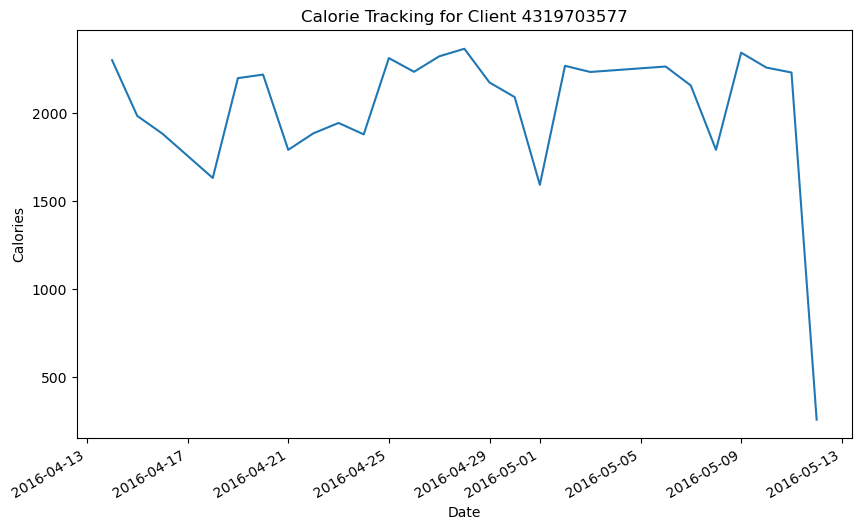

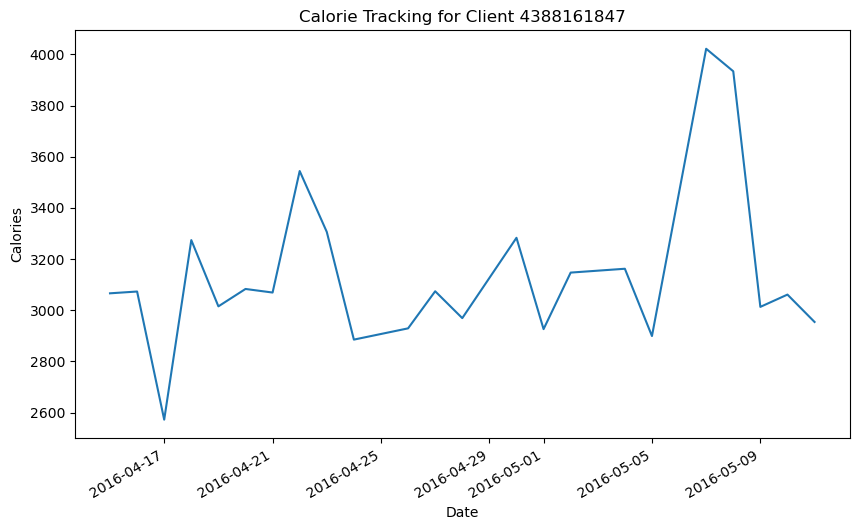

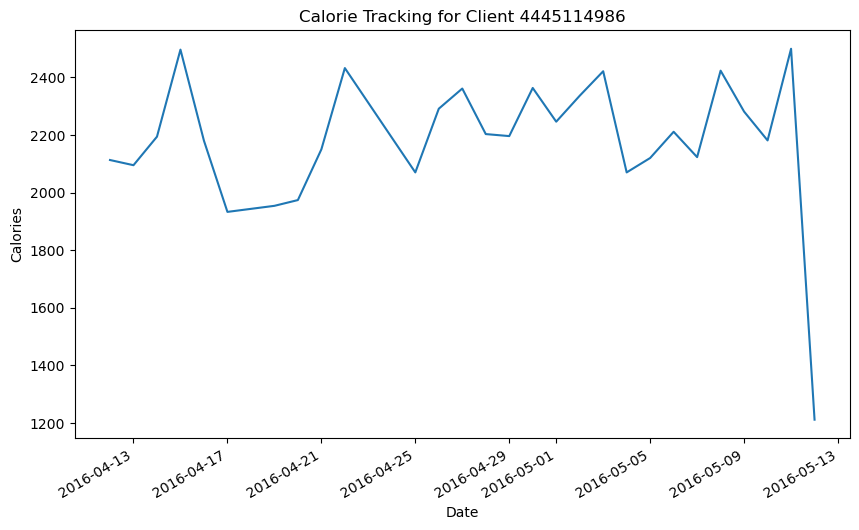

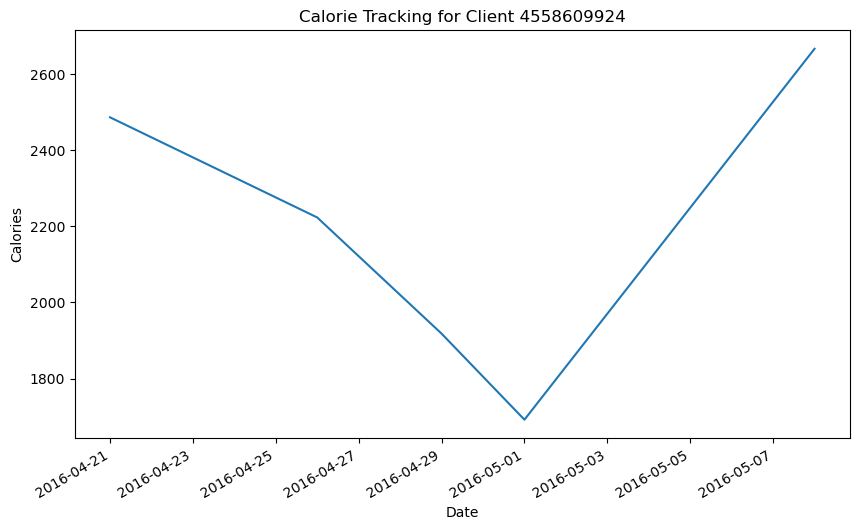

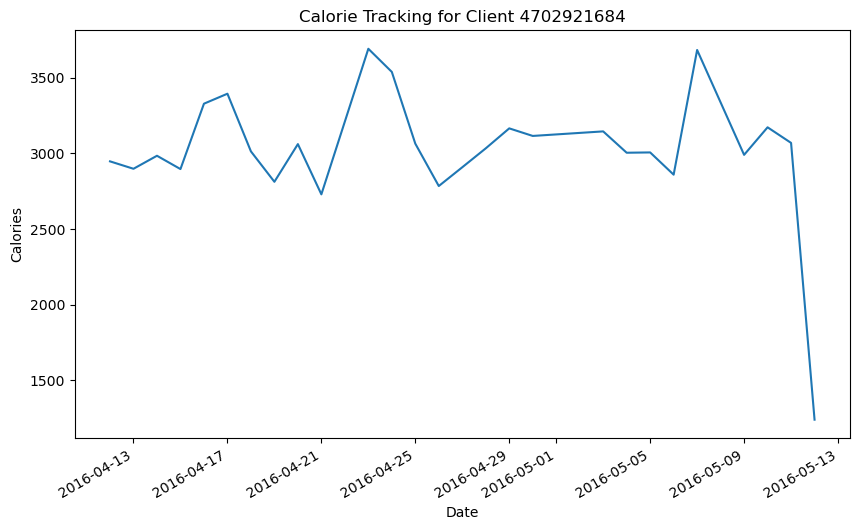

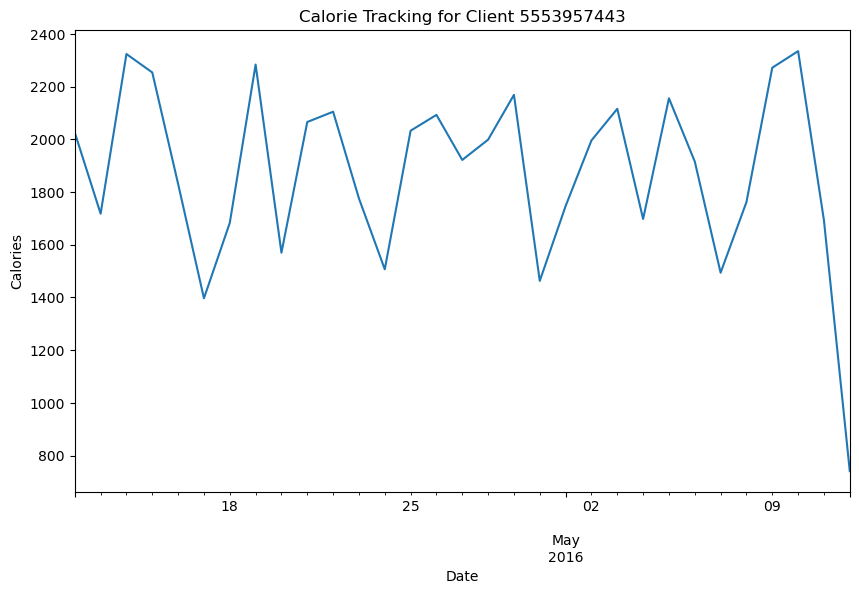

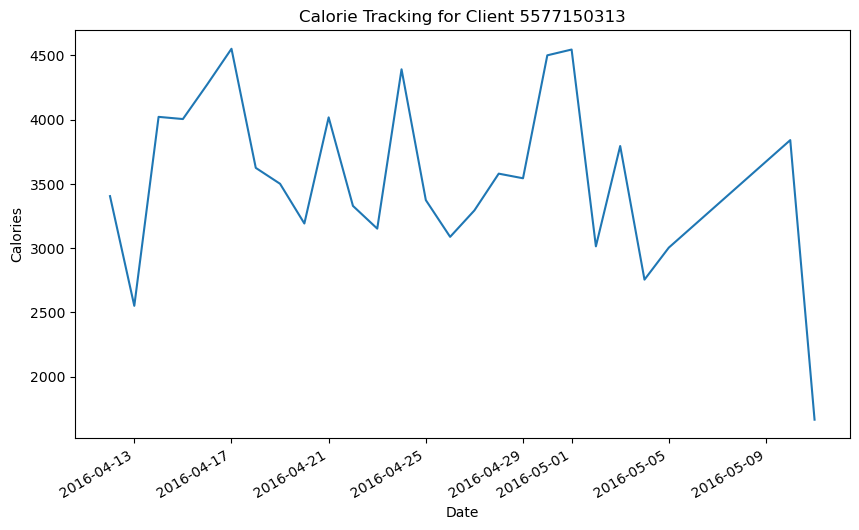

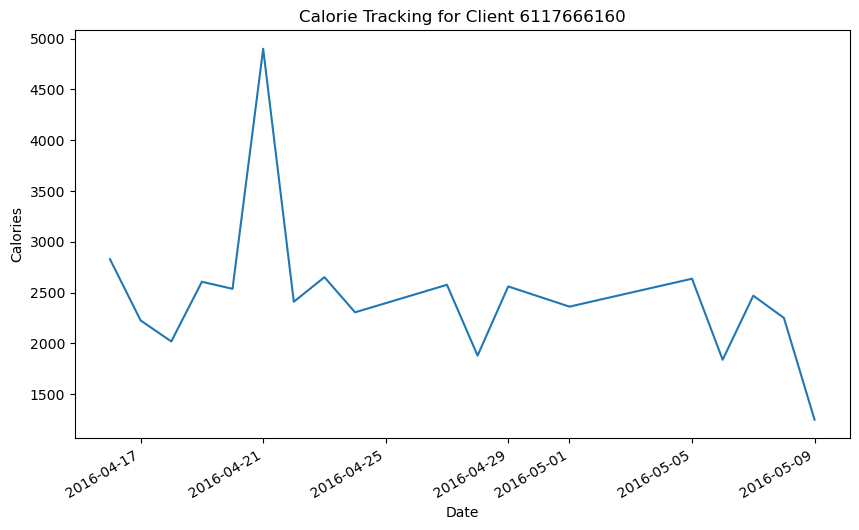

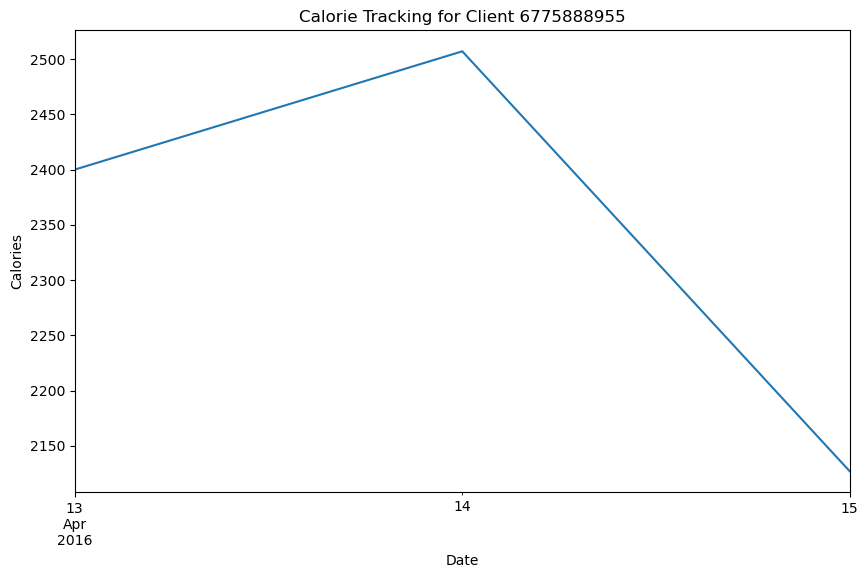

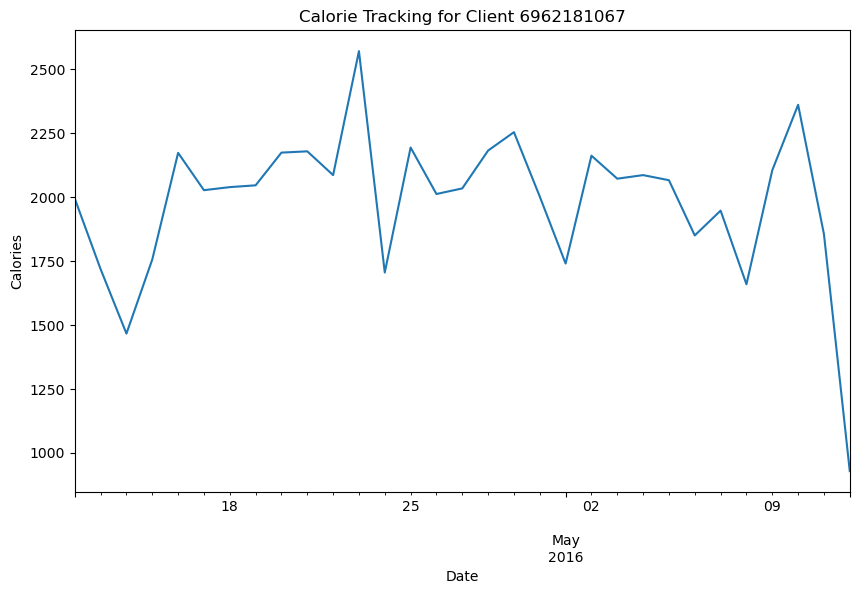

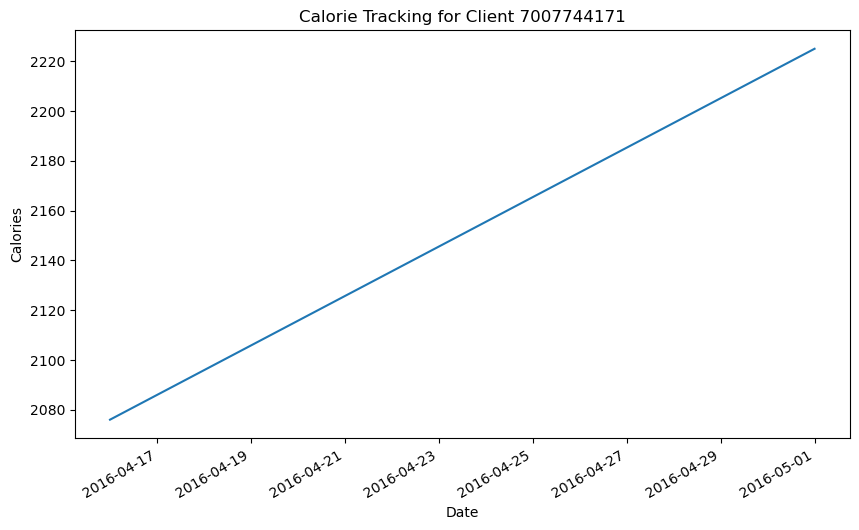

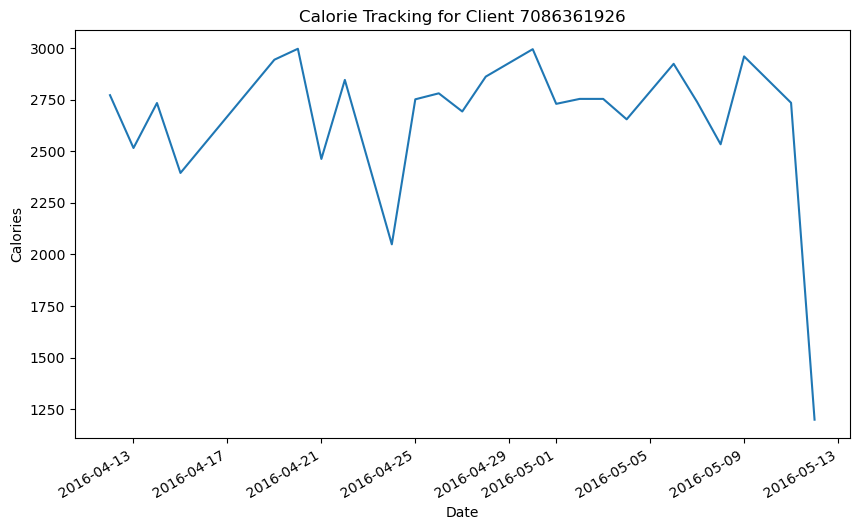

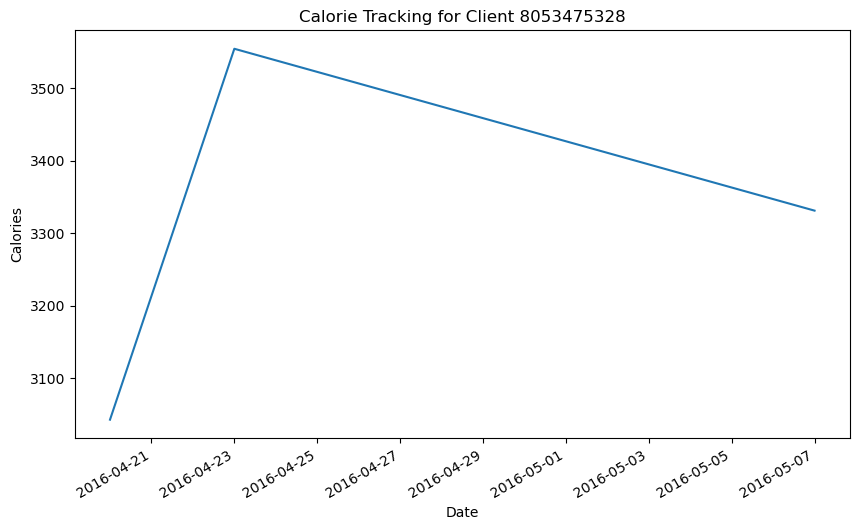

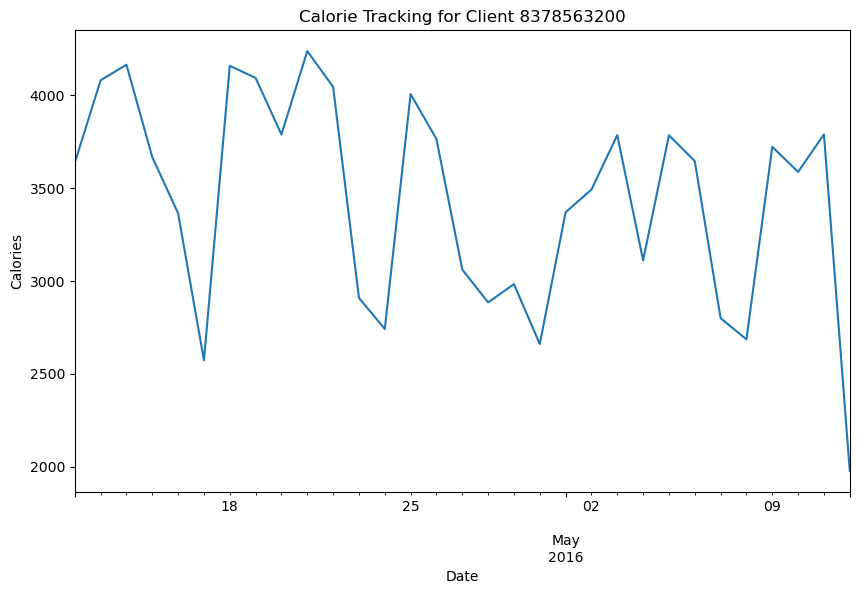

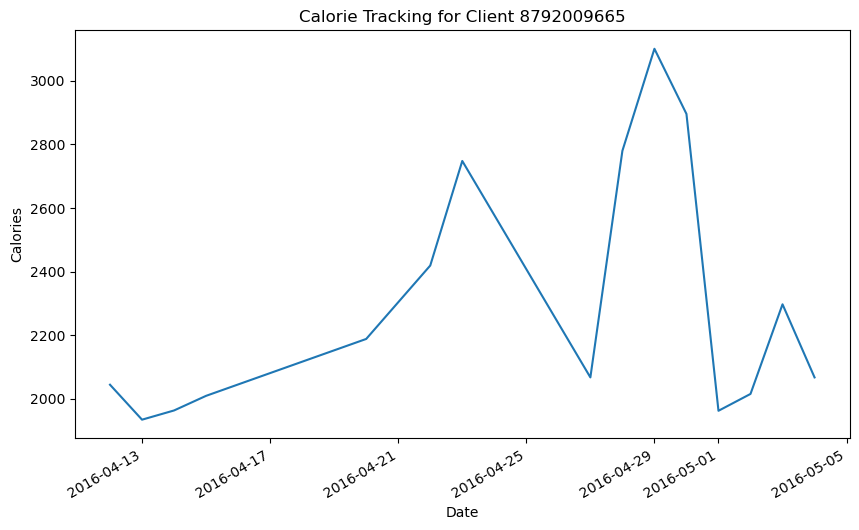

In [55]:
# Pivot the DataFrame for easy plotting
df_pivoted2 = grouped['Calories'].unstack(level=0)

# Plotting
for client_id in df_pivoted2.columns:
    plt.figure(figsize=(10, 6))
    df_pivoted2[client_id].dropna().plot(title=f'Calorie Tracking for Client {client_id}')
    plt.xlabel('Date')
    plt.ylabel('Calories')
    plt.show()

In [ ]:
bw_dist = np.random.normal(150, 35, 1000)

plt.hist(bw_dist, bins=30, edgecolor='black')
plt.xlabel('Body Weight')
plt.ylabel('Frequency')
plt.title('Synthetic Sample of Body Weights')
plt.show()

my_df['body_weight'] = bw_dist